<a href="https://colab.research.google.com/github/SirHarginger/Public-Sentiment-Dynamics-EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project topic : Exploring Public Sentiment Dynamics: An EDA of Twitter and Reddit Discourse

In [ ]:
# importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import spacy
from textblob import TextBlob
from collections import Counter
from scipy import stats



In [ ]:
# mount on google
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing file path from google drive
twitter_path = pd.read_csv('/content/drive/MyDrive/IBM_EDA/Twitter_Data.csv')
reddit_path = pd.read_csv('/content/drive/MyDrive/IBM_EDA/Reddit_Data.csv')

In [ ]:
twitter_path.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twitter_path.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [ ]:
twitter_path.describe()

,twitter_sentiment
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
twitter_path.shape

(162980, 2)

In [ ]:
reddit_path.head()

In [ ]:
reddit_path.head()

In [ ]:
reddit_path.describe()

,reddit_sentiment
count,37249.000000
mean,0.202771
std,0.778515
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
reddit_path.shape

(37249, 2)

# Renaming columns

In [ ]:
# Rename 'category' column to 'twitter_sentiment' in twitter_path
twitter_path.rename(columns={'twitter_category': 'twitter_sentiment'}, inplace=True)

# Rename 'category' column to 'reddit_sentiment' in reddit_path
reddit_path.rename(columns={'twitter_category': 'reddit_sentiment'}, inplace=True)


In [ ]:
twitter_path.head()

,clean_text,twitter_sentiment
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twitter_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   clean_text         162976 non-null  object 
 1   twitter_sentiment  162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [ ]:
reddit_path.head()

,clean_comment,reddit_sentiment
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
reddit_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   clean_comment     37149 non-null  object
 1   reddit_sentiment  37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


# Merging the two datasets

In [ ]:
# Merge the datasets based on their respective columns
df = pd.concat([reddit_path, twitter_path], ignore_index=True)


In [ ]:
df

,clean_comment,reddit_sentiment,clean_text,twitter_sentiment
0,family mormon have never tried explain them t...,positive_comment,NaN,NaN
1,buddhism has very much lot compatible with chr...,positive_comment,NaN,NaN
2,seriously don say thing first all they won get...,negative_comment,NaN,NaN
3,what you have learned yours and only yours wha...,neutral_comment,NaN,NaN
4,for your own benefit you may want read living ...,positive_comment,NaN,NaN
...,...,...,...,...
200224,NaN,NaN,why these 456 crores paid neerav modi not reco...,negative_tweet
200225,NaN,NaN,dear rss terrorist payal gawar what about modi...,negative_tweet
200226,NaN,NaN,did you cover her interaction forum where she ...,neutral_tweet
200227,NaN,NaN,there big project came into india modi dream p...,neutral_tweet


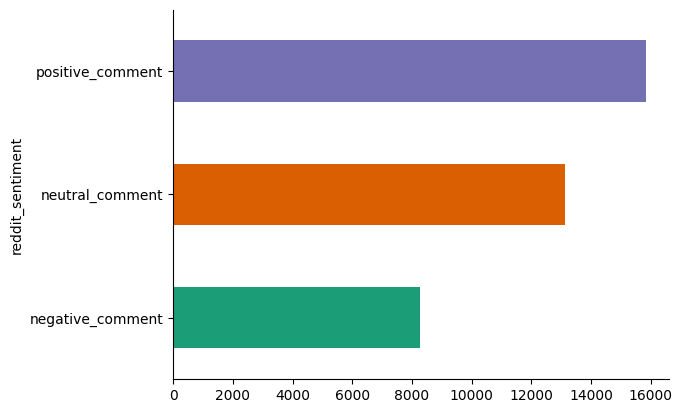

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('reddit_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

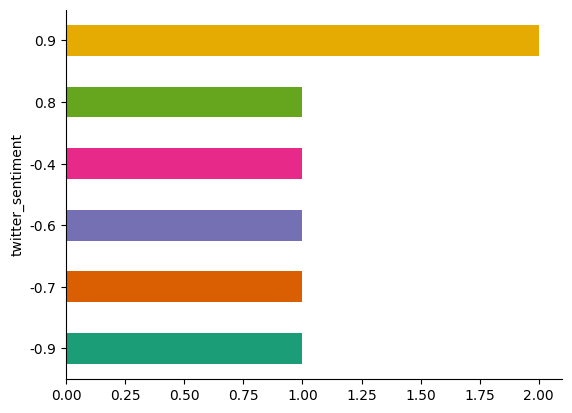

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('twitter_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   clean_comment      37149 non-null   object 
 1   reddit_sentiment   37249 non-null   float64
 2   clean_text         162976 non-null  object 
 3   twitter_sentiment  162973 non-null  float64
dtypes: float64(2), object(2)
memory usage: 6.1+ MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
reddit_sentiment,37249.0,0.202771,0.778515,-1.0,0.0,0.0,1.0,1.0
twitter_sentiment,162973.0,0.225436,0.781279,-1.0,0.0,0.0,1.0,1.0


# Display unique values in each column

In [ ]:
# Display unique values for each column in df
for column in df.columns:
    unique_values = df[column].unique()
    print(unique_values)
    print()

[' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches '
 'buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke basica

# Mapping labels to their respective meaning

In [ ]:
# Mapping labels to their respective meanings for Twitter dataset
df['twitter_sentiment'] = df['twitter_sentiment'].map({-1: 'negative_tweet', 0: 'neutral_tweet', 1: 'positive_tweet'})

# Mapping labels to their respective meanings for Reddit dataset
df['reddit_sentiment'] = df['reddit_sentiment'].map({-1: 'negative_comment', 0: 'neutral_comment', 1: 'positive_comment'})


In [ ]:
df

,clean_comment,reddit_sentiment,clean_text,twitter_sentiment
0,family mormon have never tried explain them t...,positive_comment,NaN,NaN
1,buddhism has very much lot compatible with chr...,positive_comment,NaN,NaN
2,seriously don say thing first all they won get...,negative_comment,NaN,NaN
3,what you have learned yours and only yours wha...,neutral_comment,NaN,NaN
4,for your own benefit you may want read living ...,positive_comment,NaN,NaN
...,...,...,...,...
200224,NaN,NaN,why these 456 crores paid neerav modi not reco...,negative_tweet
200225,NaN,NaN,dear rss terrorist payal gawar what about modi...,negative_tweet
200226,NaN,NaN,did you cover her interaction forum where she ...,neutral_tweet
200227,NaN,NaN,there big project came into india modi dream p...,neutral_tweet


# Missing values and outliers

In [ ]:
# check for missing values
df.isnull().sum()


clean_comment        0
clean_text           0
reddit_sentiment     0
twitter_sentiment    0
dtype: int64

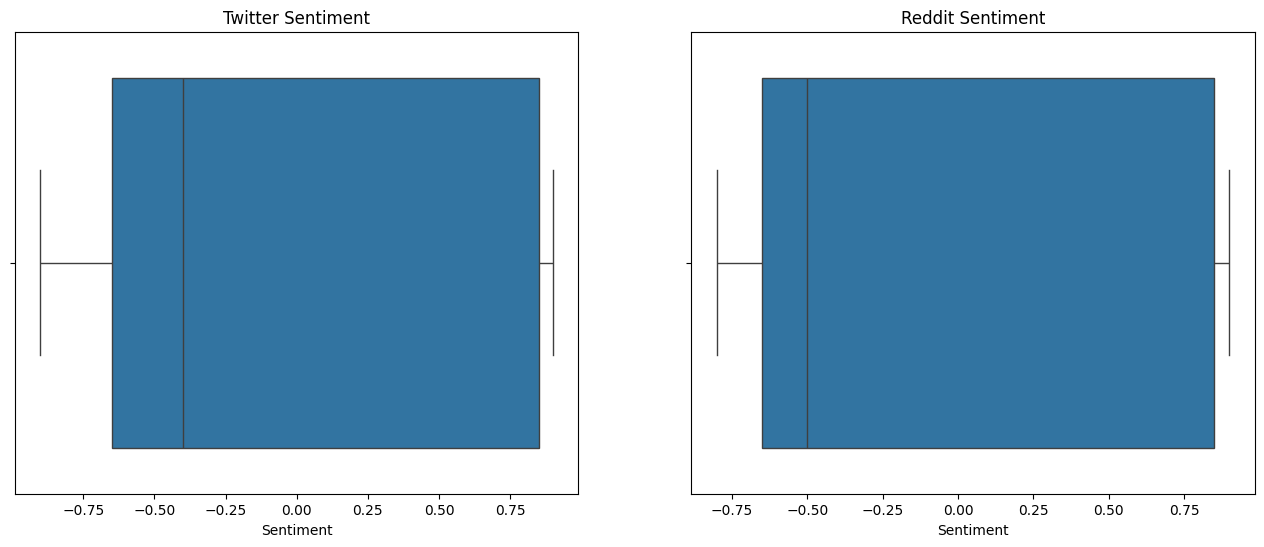

In [ ]:
# prompt: check for ouliers

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='twitter_sentiment', ax=ax[0])
ax[0].set_title('Twitter Sentiment')
ax[0].set_xlabel('Sentiment')

sns.boxplot(data=df, x='reddit_sentiment', ax=ax[1])
ax[1].set_title('Reddit Sentiment')
ax[1].set_xlabel('Sentiment')

plt.show()


# Visualisation

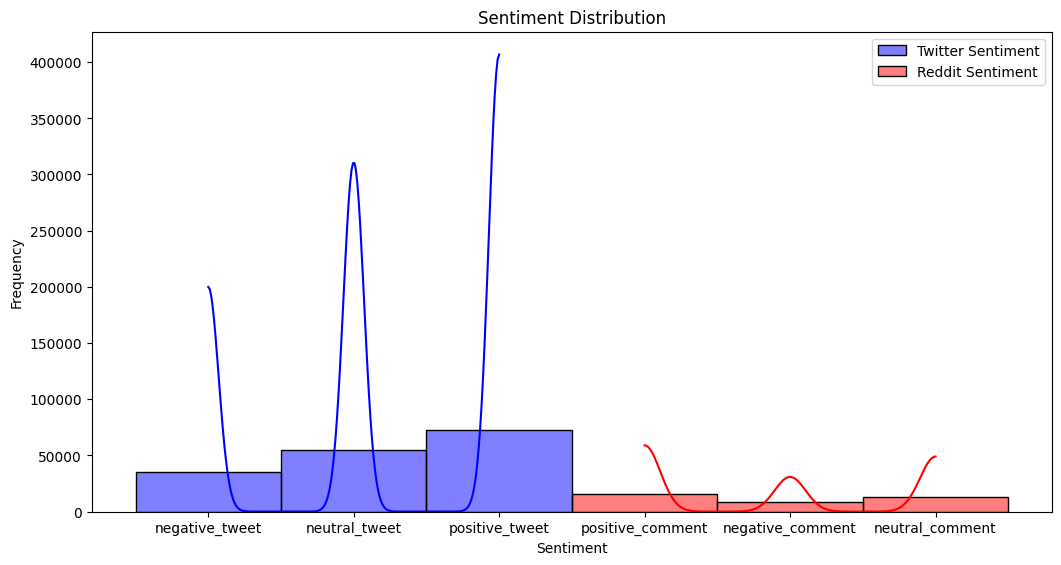

In [ ]:
# Histograms for sentiment labels
plt.figure(figsize=(12, 6))

# Twitter Sentiment Distribution
sns.histplot(df['twitter_sentiment'], bins=3, kde=True, color='blue', label='Twitter Sentiment')

# Reddit Sentiment Distribution
sns.histplot(df['reddit_sentiment'], bins=3, kde=True, color='red', label='Reddit Sentiment')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Extracting the statistical information from the histogram
twitter_negative_count = df['twitter_sentiment'].value_counts()['negative_tweet']
twitter_neutral_count = df['twitter_sentiment'].value_counts()['neutral_tweet']
twitter_positive_count = df['twitter_sentiment'].value_counts()['positive_tweet']

reddit_negative_count = df['reddit_sentiment'].value_counts()['negative_comment']
reddit_neutral_count = df['reddit_sentiment'].value_counts()['neutral_comment']
reddit_positive_count = df['reddit_sentiment'].value_counts()['positive_comment']

# Printing the statistical information
print("Twitter Sentiment Distribution:")
print("- Negative Tweets:", twitter_negative_count)
print("- Neutral Tweets:", twitter_neutral_count)
print("- Positive Tweets:", twitter_positive_count)

print("\nReddit Sentiment Distribution:")
print("- Negative Comments:", reddit_negative_count)
print("- Neutral Comments:", reddit_neutral_count)
print("- Positive Comments:", reddit_positive_count)


Twitter Sentiment Distribution:
- Negative Tweets: 35510
- Neutral Tweets: 55213
- Positive Tweets: 72250

Reddit Sentiment Distribution:
- Negative Comments: 8277
- Neutral Comments: 13142
- Positive Comments: 15830


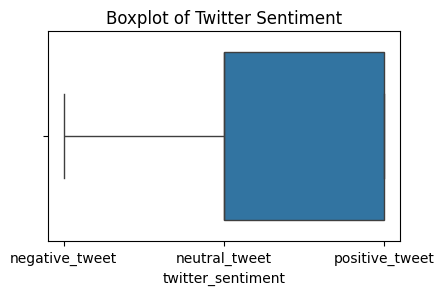

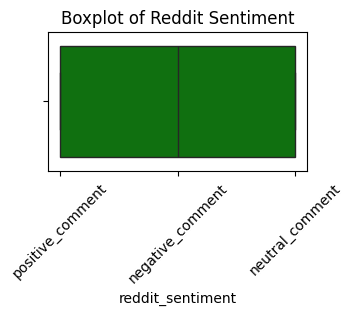

In [ ]:
#Boxplots for sentiment labels

plt.figure(figsize=(10, 6))


plt.subplot(2, 2, 1)
sns.boxplot(x='twitter_sentiment', data=df)
plt.title('Boxplot of Twitter Sentiment')
plt.show()

plt.subplot(2, 2, 2)
sns.boxplot(x='reddit_sentiment', color= 'green', data=df)
plt.title('Boxplot of Reddit Sentiment')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [ ]:
# Extracting statistical information from the boxplots
twitter_sentiment_stats = df.groupby('twitter_sentiment')['twitter_sentiment'].describe()
reddit_sentiment_stats = df.groupby('reddit_sentiment')['reddit_sentiment'].describe()

# Printing the statistical information
print("Twitter Sentiment Statistics:")
print(twitter_sentiment_stats)

print("\nReddit Sentiment Statistics:")
print(reddit_sentiment_stats)


Twitter Sentiment Statistics:
                   count unique             top   freq
twitter_sentiment                                     
negative_tweet     35510      1  negative_tweet  35510
neutral_tweet      55213      1   neutral_tweet  55213
positive_tweet     72250      1  positive_tweet  72250

Reddit Sentiment Statistics:
                  count unique               top   freq
reddit_sentiment                                       
negative_comment   8277      1  negative_comment   8277
neutral_comment   13142      1   neutral_comment  13142
positive_comment  15830      1  positive_comment  15830


# Analyzing the relationship between sentiment and comment length, vocabulary richness, presence of specific emotions ( anger, joy, fear)

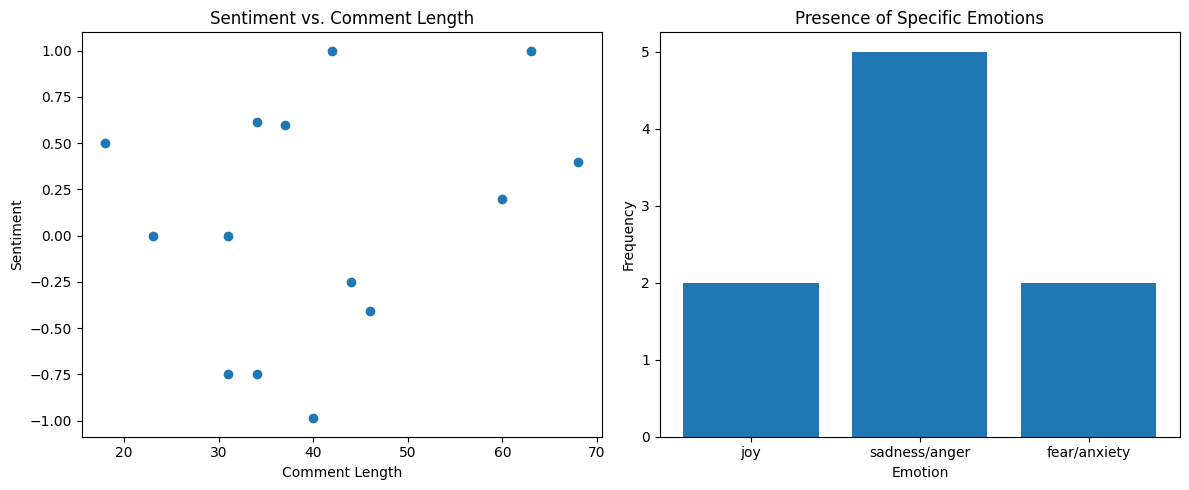

In [ ]:
# Load spaCy model for English language
nlp = spacy.load("en_core_web_sm")


# Analyze sentiment, comment length, and presence of specific emotions for each comment
sentiments = []
comment_lengths = []
emotions = Counter()

for index, row in df.iterrows():
    # Sentiment analysis using TextBlob
    blob_comment = TextBlob(row['clean_comment'])
    sentiment_comment = blob_comment.sentiment.polarity
    sentiments.append(sentiment_comment)

    blob_text = TextBlob(row['clean_text'])
    sentiment_text = blob_text.sentiment.polarity
    sentiments.append(sentiment_text)

    # Comment length
    comment_length_comment = len(row['clean_comment'])
    comment_lengths.append(comment_length_comment)

    comment_length_text = len(row['clean_text'])
    comment_lengths.append(comment_length_text)

    # Named entity recognition and emotion detection using spaCy
    doc_comment = nlp(row['clean_comment'])
    doc_text = nlp(row['clean_text'])

    for token in doc_comment:
        if token.text.lower() in ["happy", "joy", "excited", "ecstatic"]:
            emotions["joy"] += 1
        elif token.text.lower() in ["sad", "disappointed", "awful", "angry"]:
            emotions["sadness/anger"] += 1
        elif token.text.lower() in ["scared", "fear", "anxious"]:
            emotions["fear/anxiety"] += 1

    for token in doc_text:
        if token.text.lower() in ["happy", "joy", "excited", "ecstatic"]:
            emotions["joy"] += 1
        elif token.text.lower() in ["sad", "disappointed", "awful", "angry"]:
            emotions["sadness/anger"] += 1
        elif token.text.lower() in ["scared", "fear", "anxious"]:
            emotions["fear/anxiety"] += 1

# Plotting
plt.figure(figsize=(12, 5))

# Relationship between sentiment and comment length
plt.subplot(1, 2, 1)
plt.scatter(comment_lengths, sentiments)
plt.title('Sentiment vs. Comment Length')
plt.xlabel('Comment Length')
plt.ylabel('Sentiment')

# Presence of specific emotions
plt.subplot(1, 2, 2)
emotions_labels = list(emotions.keys())
emotions_counts = list(emotions.values())
plt.bar(emotions_labels, emotions_counts)
plt.title('Presence of Specific Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Hypothesis testing

In [ ]:
# Defining the null and alternative hypotheses
null_hypothesis = "There is no significant difference in sentiment between Twitter and Reddit."
alternative_hypothesis = "There is a significant difference in sentiment between Twitter and Reddit."

# Extracting sentiment data from the DataFrame
twitter_sentiment = df['twitter_sentiment']
reddit_sentiment = df['reddit_sentiment']

# Performing a two-sample t-test to compare the means
t_statistic, p_value = stats.ttest_ind(twitter_sentiment, reddit_sentiment)

# Setting the significance level
alpha = 0.05

# Decision based on the p-value
if p_value < alpha:
    print(f"Reject the null hypothesis: {alternative_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis: {null_hypothesis}")


Fail to reject the null hypothesis: There is no significant difference in sentiment between Twitter and Reddit.
